# 

# 

# Loan Application Status Prediction

### Project Objective:

The project's primary objective is to develop a classification model for Loan Application Status Prediction, with the aim of assisting financial institutions in automating the loan approval process while effectively managing the risk of loan defaults. This project encompasses data collection, preprocessing, exploratory data analysis, feature engineering, model development, evaluation, optimization, deployment, and ongoing monitoring. The ultimate goal is to provide financial institutions with a reliable tool for accurately predicting loan application outcomes, resulting in faster loan processing, improved risk assessment, and enhanced customer satisfaction.

# 

# 

## Importing Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

# 

## Importing Dataset

In [2]:
df = pd.read_csv("loan_prediction.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# 

## EDA

In [3]:
df.shape

(614, 13)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.isna().sum().sum()

149

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


### Checking Unique values

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Loan_ID
Unique Values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP00128

### Dropping Columns

##### Dropping columns that have only single values or irrelevent data

In [9]:
df.drop(['Loan_ID'], axis=1,inplace=True)
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# 

# 

## Imputation of Categorical values

### Getting Categorical columns

In [10]:
cat_df = df.select_dtypes(include=['object', 'category']).copy()
cat_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y


### Checking Unique values

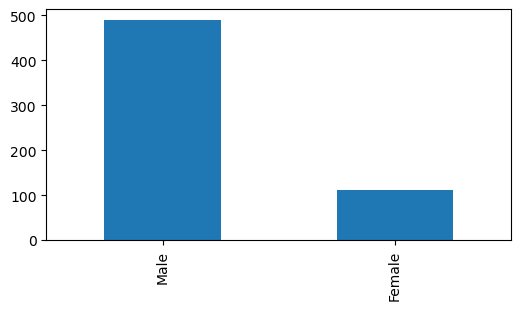

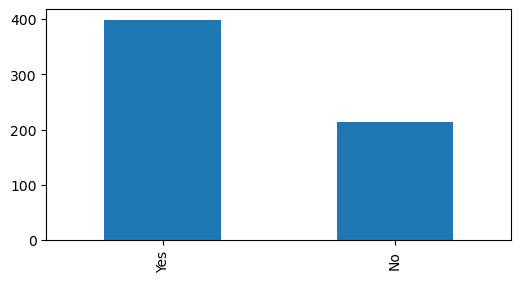

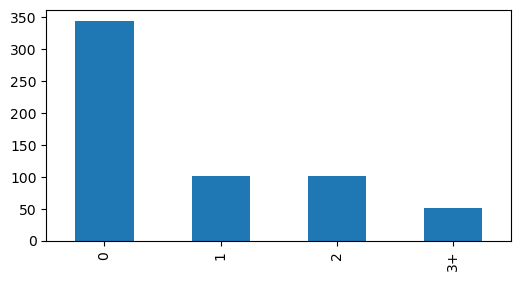

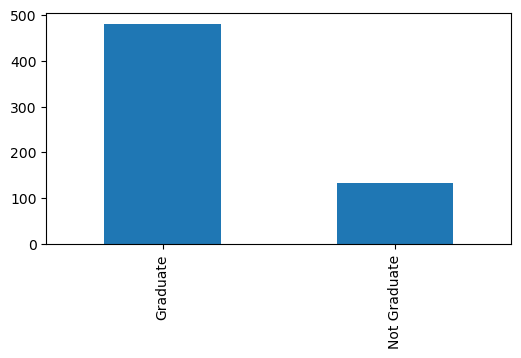

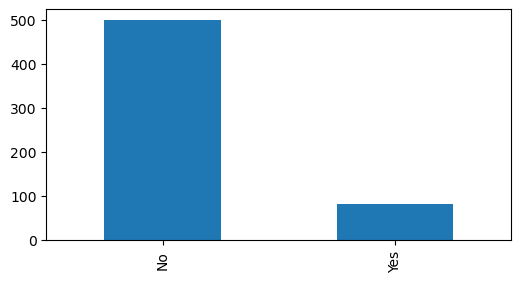

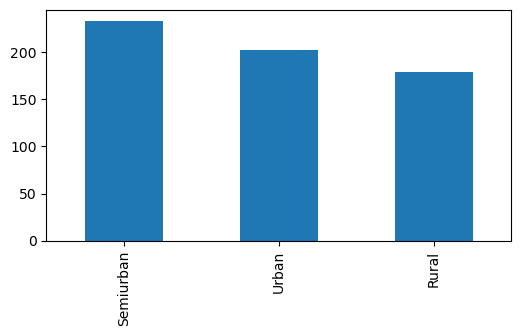

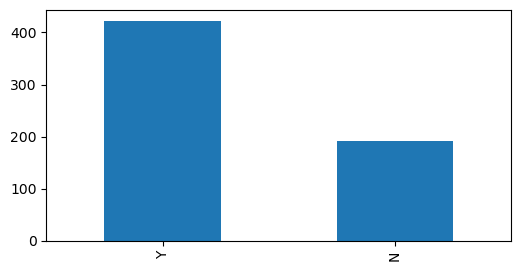

In [11]:
for column in cat_df.columns:
    plt.figure(figsize=(6, 3))
    cat_df[column].value_counts().plot.bar()

### Checking Null values

In [12]:
for column in df.columns:
    null_values = df[column].isnull().sum()
    null_values_ = df[column].isnull().mean()
    total_count = df[column].count()
    mode = df[column].value_counts().idxmax()
    mode_value = df[column].value_counts().max()
    
    
    print(f"Column: {column}")
    print(f"No. of Null Values: {null_values}")
    print(f"% of Null Values: {null_values_}")
    print(f"Total Value Count: {total_count}")
    print(f"Most appeared value: {mode}: {mode_value}")
    
    print('\n')

Column: Gender
No. of Null Values: 13
% of Null Values: 0.021172638436482084
Total Value Count: 601
Most appeared value: Male: 489


Column: Married
No. of Null Values: 3
% of Null Values: 0.004885993485342019
Total Value Count: 611
Most appeared value: Yes: 398


Column: Dependents
No. of Null Values: 15
% of Null Values: 0.024429967426710098
Total Value Count: 599
Most appeared value: 0: 345


Column: Education
No. of Null Values: 0
% of Null Values: 0.0
Total Value Count: 614
Most appeared value: Graduate: 480


Column: Self_Employed
No. of Null Values: 32
% of Null Values: 0.05211726384364821
Total Value Count: 582
Most appeared value: No: 500


Column: ApplicantIncome
No. of Null Values: 0
% of Null Values: 0.0
Total Value Count: 614
Most appeared value: 2500: 9


Column: CoapplicantIncome
No. of Null Values: 0
% of Null Values: 0.0
Total Value Count: 614
Most appeared value: 0.0: 273


Column: LoanAmount
No. of Null Values: 22
% of Null Values: 0.035830618892508145
Total Value Co

###### The Null values was less than 1% of the Mode data, hence it was replaced with Mode data

### Getting Categorical columns with Null values

In [13]:
null_df = cat_df[cat_df.columns[cat_df.isnull().any()]]
null_df.head(3)

,Gender,Married,Dependents,Self_Employed
0,Male,No,0,No
1,Male,Yes,1,No
2,Male,Yes,0,Yes


### Imputing null values of Categorical columns

In [14]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [15]:
for column in null_df.columns:
    
    print(column)
    print('Value count before Imputation')
    print(df[column].value_counts())
    
    df[[column]]=mode_imp.fit_transform(df[[column]])
    
    print('Value count after Imputation')
    print(df[column].value_counts())
    print('\n')

Gender
Value count before Imputation
Male      489
Female    112
Name: Gender, dtype: int64
Value count after Imputation
Male      502
Female    112
Name: Gender, dtype: int64


Married
Value count before Imputation
Yes    398
No     213
Name: Married, dtype: int64
Value count after Imputation
Yes    401
No     213
Name: Married, dtype: int64


Dependents
Value count before Imputation
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Value count after Imputation
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Self_Employed
Value count before Imputation
No     500
Yes     82
Name: Self_Employed, dtype: int64
Value count after Imputation
No     532
Yes     82
Name: Self_Employed, dtype: int64




# 

# 

## Imputation of Continuous values

### Getting columns with Null values

In [16]:
con_df = df.select_dtypes(include=['float64', 'int64']).copy()
con_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [17]:
null_df = con_df[con_df.columns[con_df.isnull().any()]]
null_df.head(3)

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0


In [18]:
null_df.isna().sum()

LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [19]:
for column in null_df.columns:
    null_values = df[column].isnull().sum()
    null_values_ = df[column].isnull().mean()
    
    
    print(f"Column: {column}")
    print(f"No. of Null Values: {null_values}")
    print(f"% of Null Values: {null_values_}")
    
    print('\n')

Column: LoanAmount
No. of Null Values: 22
% of Null Values: 0.035830618892508145


Column: Loan_Amount_Term
No. of Null Values: 14
% of Null Values: 0.02280130293159609


Column: Credit_History
No. of Null Values: 50
% of Null Values: 0.08143322475570032




###### The Null values in continious value columns are less than 1%, hence we can directly replace than with the Mean.

### Imputating null values of Continuous columns

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy='mean')

In [22]:
for column in null_df.columns:
    
    print(column) 
    print(f"% of Null Values: {df[column].isnull().mean()}")
    
    imputer.fit(df[[column]])
    df[column] = imputer.transform(df[[column]])
    
    print(f"% of Null Values: {df[column].isnull().mean()}")
    print('\n')

LoanAmount
% of Null Values: 0.035830618892508145
% of Null Values: 0.0


Loan_Amount_Term
% of Null Values: 0.02280130293159609
% of Null Values: 0.0


Credit_History
% of Null Values: 0.08143322475570032
% of Null Values: 0.0




In [23]:
df.isnull().sum().sum()

0

# 

# 

## Encoding

In [24]:
dt=df.copy()
dt.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [25]:
dt.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
dt.shape

(614, 12)

### Encoding Target values

In [27]:
dt['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
dt['Loan_Status']=dt['Loan_Status'].replace('Y', 1)
dt['Loan_Status']=dt['Loan_Status'].replace('N', 0)

### Checking Value counts of Categorical Columns

In [29]:
encode_columns = dt.select_dtypes(include=['object']).copy()

In [30]:
for column in encode_columns.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: Gender
Unique Values: Male      502
Female    112
Name: Gender, dtype: int64


Column: Married
Unique Values: Yes    401
No     213
Name: Married, dtype: int64


Column: Dependents
Unique Values: 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Column: Education
Unique Values: Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Column: Self_Employed
Unique Values: No     532
Yes     82
Name: Self_Employed, dtype: int64


Column: Property_Area
Unique Values: Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64




### Encoding Categorical Values

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
for column in encode_columns:
    dt[column] = le.fit_transform(dt[column])

### Checking Value counts of Categorical Columns

In [33]:
for column in encode_columns.columns:
    value_count = dt[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {value_count}")
    print('\n')

Column: Gender
Unique Values: 1    502
0    112
Name: Gender, dtype: int64


Column: Married
Unique Values: 1    401
0    213
Name: Married, dtype: int64


Column: Dependents
Unique Values: 0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


Column: Education
Unique Values: 0    480
1    134
Name: Education, dtype: int64


Column: Self_Employed
Unique Values: 0    532
1     82
Name: Self_Employed, dtype: int64


Column: Property_Area
Unique Values: 1    233
2    202
0    179
Name: Property_Area, dtype: int64




In [34]:
dt.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1


# 

# 

## Feature Selection

### Getting Contribution Score

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

In [36]:
x = dt.drop(columns="Loan_Status", axis = 1)
y = dt.loc[:, "Loan_Status"]

In [37]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [38]:
feature_scores = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(fit.scores_)], axis= 1) 
feature_scores.columns = ["feature", "score"]
feature_scores.sort_values (by="score", ascending=False)

,feature,score
6,CoapplicantIncome,11342.041603
5,ApplicantIncome,93.904964
7,LoanAmount,39.211545
9,Credit_History,25.998867
3,Education,3.540502
8,Loan_Amount_Term,3.267315
1,Married,1.782425
10,Property_Area,0.377837
2,Dependents,0.085953
0,Gender,0.036234


### Visual Representation

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [41]:
print(model.feature_importances_)

[0.02295283 0.02122925 0.05841217 0.02045994 0.02142638 0.17415011
 0.11311989 0.17586565 0.05117497 0.29426008 0.04694873]


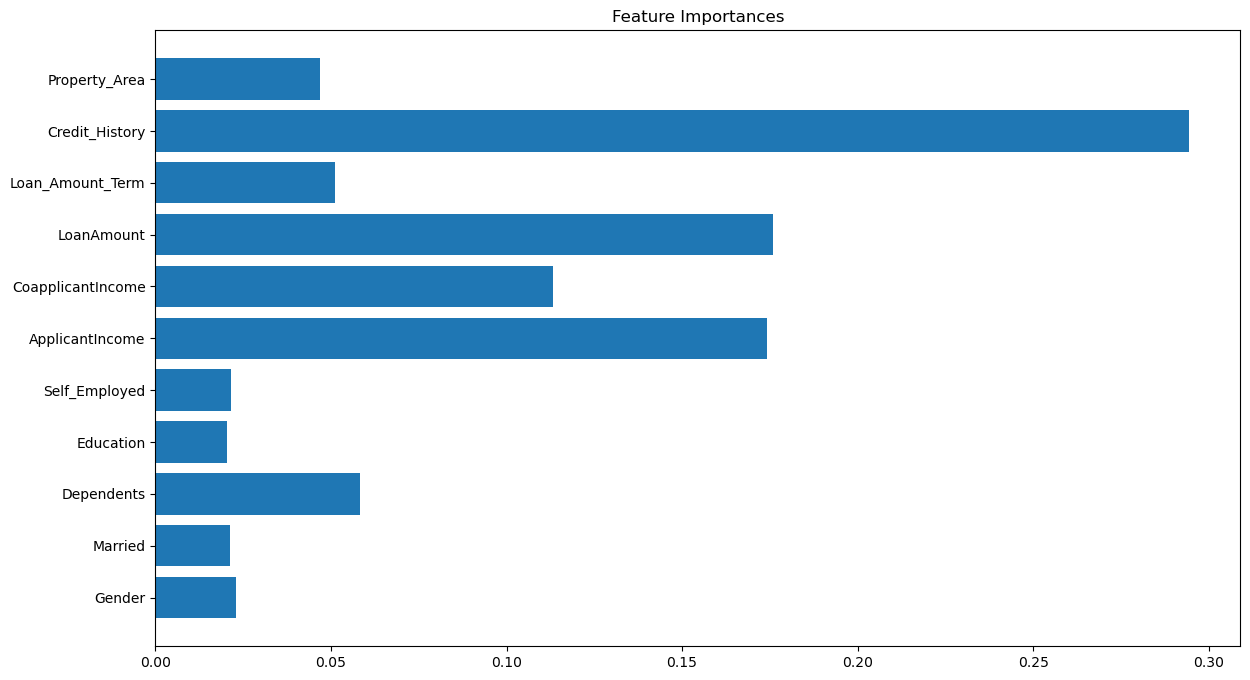

In [42]:
plt.figure(figsize=(14,8))
plt.barh(x.columns, model.feature_importances_) 
plt.title("Feature Importances")
plt.show()

# 

# 

## Removing Multi-colinearity

In [43]:
corr = dt.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


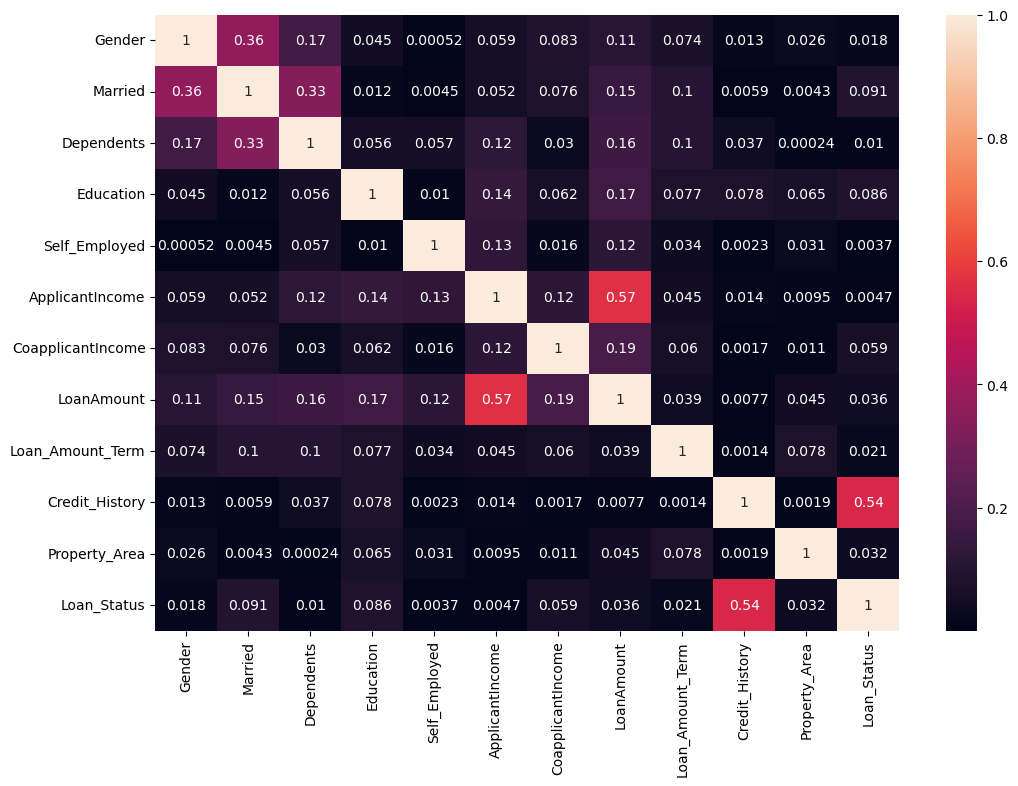

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = dt.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

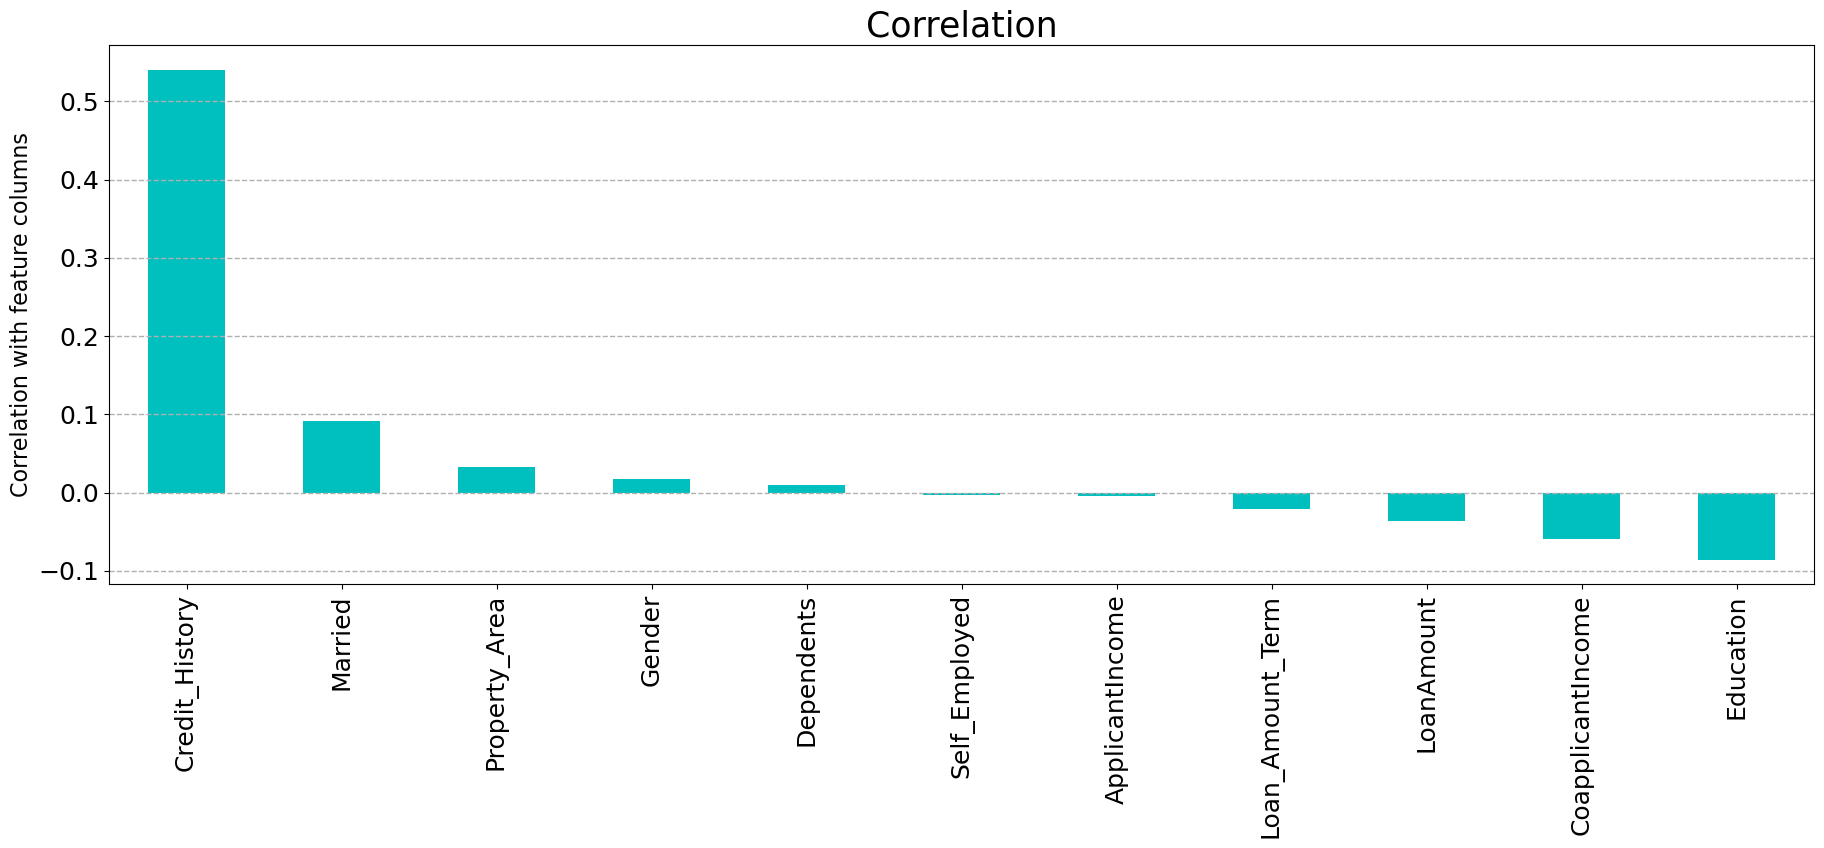

In [45]:
plt.figure(figsize=(22, 7))
dt.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar', color='c', fontsize=18)
plt.ylabel('Correlation with feature columns', fontsize=16)
plt.title('Correlation', fontsize=25)

plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1, which='both')

plt.show()

In [46]:
vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif = vif.sort_values(by="VIF Scores", ascending=False)

vif

,VIF Scores,variables
8,10.353695,Loan_Amount_Term
7,6.850020,LoanAmount
0,6.011953,Gender
9,6.002106,Credit_History
1,3.651951,Married
5,2.889657,ApplicantIncome
10,2.569692,Property_Area
2,1.791351,Dependents
6,1.479685,CoapplicantIncome
3,1.305432,Education


### Dropping columns having high Multi-colinearity

In [47]:
dt.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
dt=dt.drop(columns = ['LoanAmount'])
dt.shape

(614, 11)

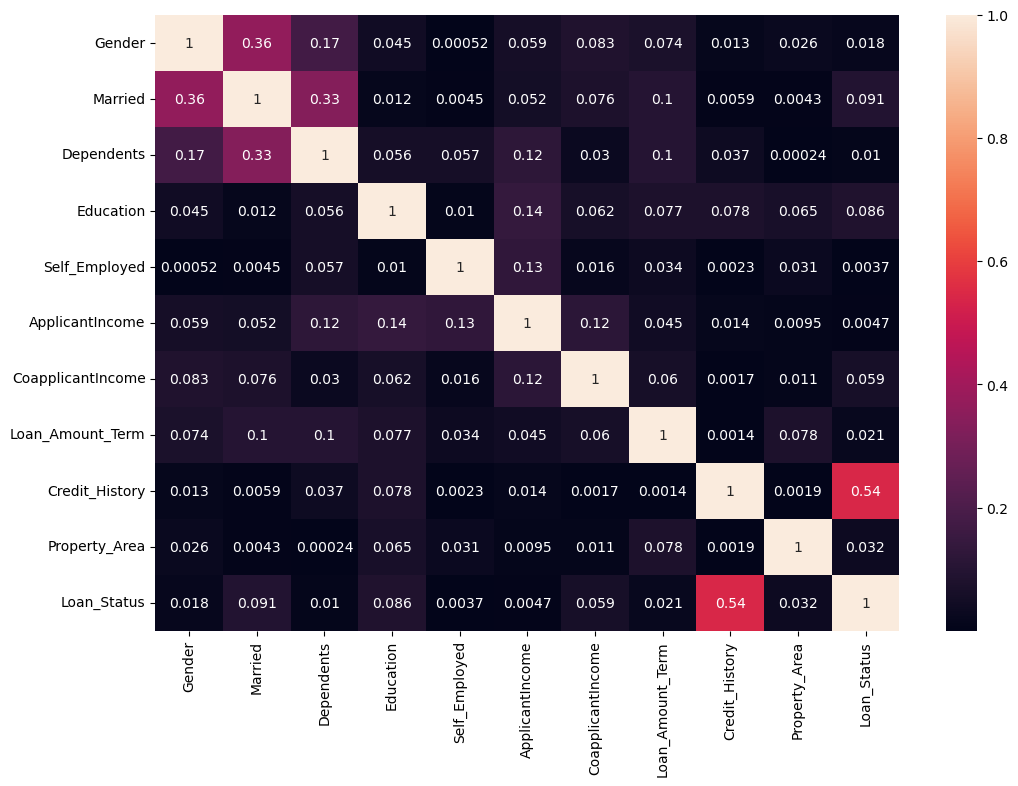

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = dt.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

## Removing Skewness

In [50]:
dt.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

### Getting Continuous columns

In [51]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
con_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).copy()
con_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [53]:
common_columns = dt.columns.intersection(con_df.columns)
ds = dt[common_columns].copy()
ds=ds.drop(columns = ['Credit_History'])
ds.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], dtype='object')

### Visual Representation

In [54]:
from scipy.stats import skew

ApplicantIncome: 6.523526250899361


<Figure size 2000x1500 with 0 Axes>

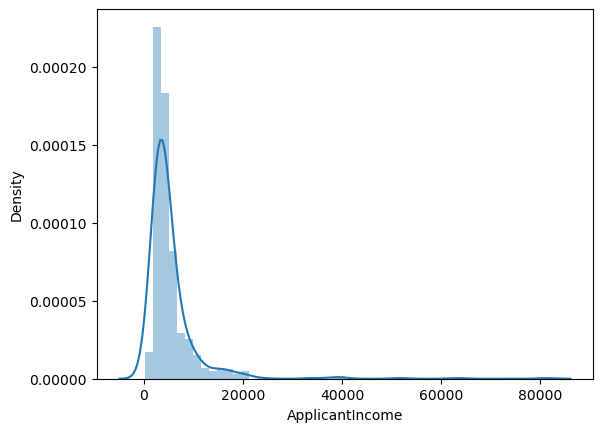

CoapplicantIncome: 7.473216996340462


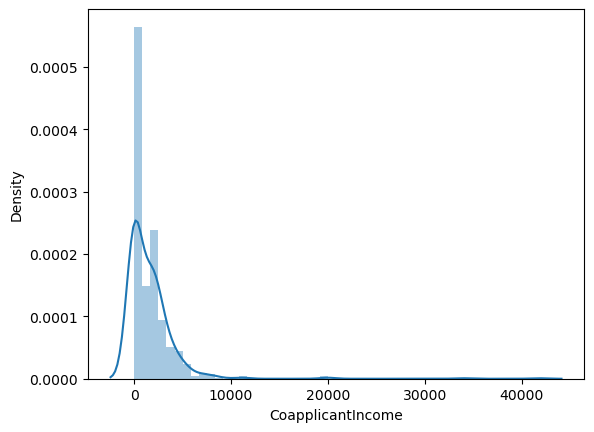

Loan_Amount_Term: -2.3838380001508668


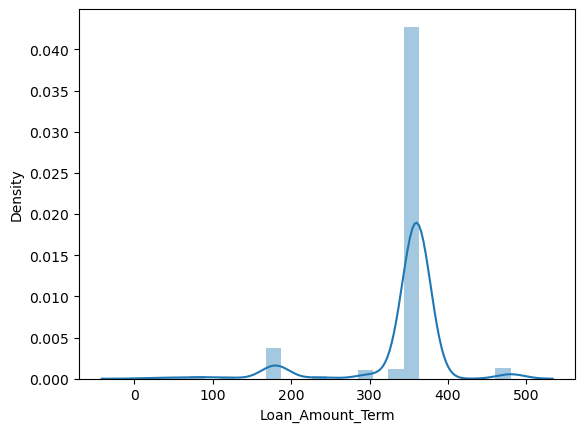

In [55]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in ds:
    print(f"\033[1m{column}: {skew(ds[column])}\033[0m")
    
    plt.figure()
    sns.distplot(ds[column])
    
    plt.show()

##### 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term' are the only continuous columns. Out of which 'ApplicantIncome' & 'CoapplicantIncome' contributes highly to Target column. Skewness of 'Loan_Amount_Term' can be removed only.

In [56]:
dt['Loan_Amount_Term'].skew()

-2.3896799467122745

In [57]:
dt['Loan_Amount_Term'] = np.power(dt['Loan_Amount_Term'],3)
dt['Loan_Amount_Term'].skew()

0.3851612757181543

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

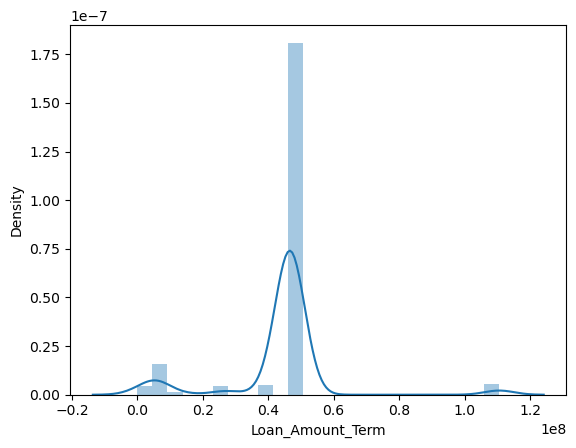

In [58]:
sns.distplot(dt['Loan_Amount_Term'])

# 

# 

## Removing Outliners

In [59]:
dt.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,4.361199e+07,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,1.637102e+07,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,1.728000e+03,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,4.665600e+07,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,4.665600e+07,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,4.665600e+07,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,1.105920e+08,1.000000,2.000000,1.000000


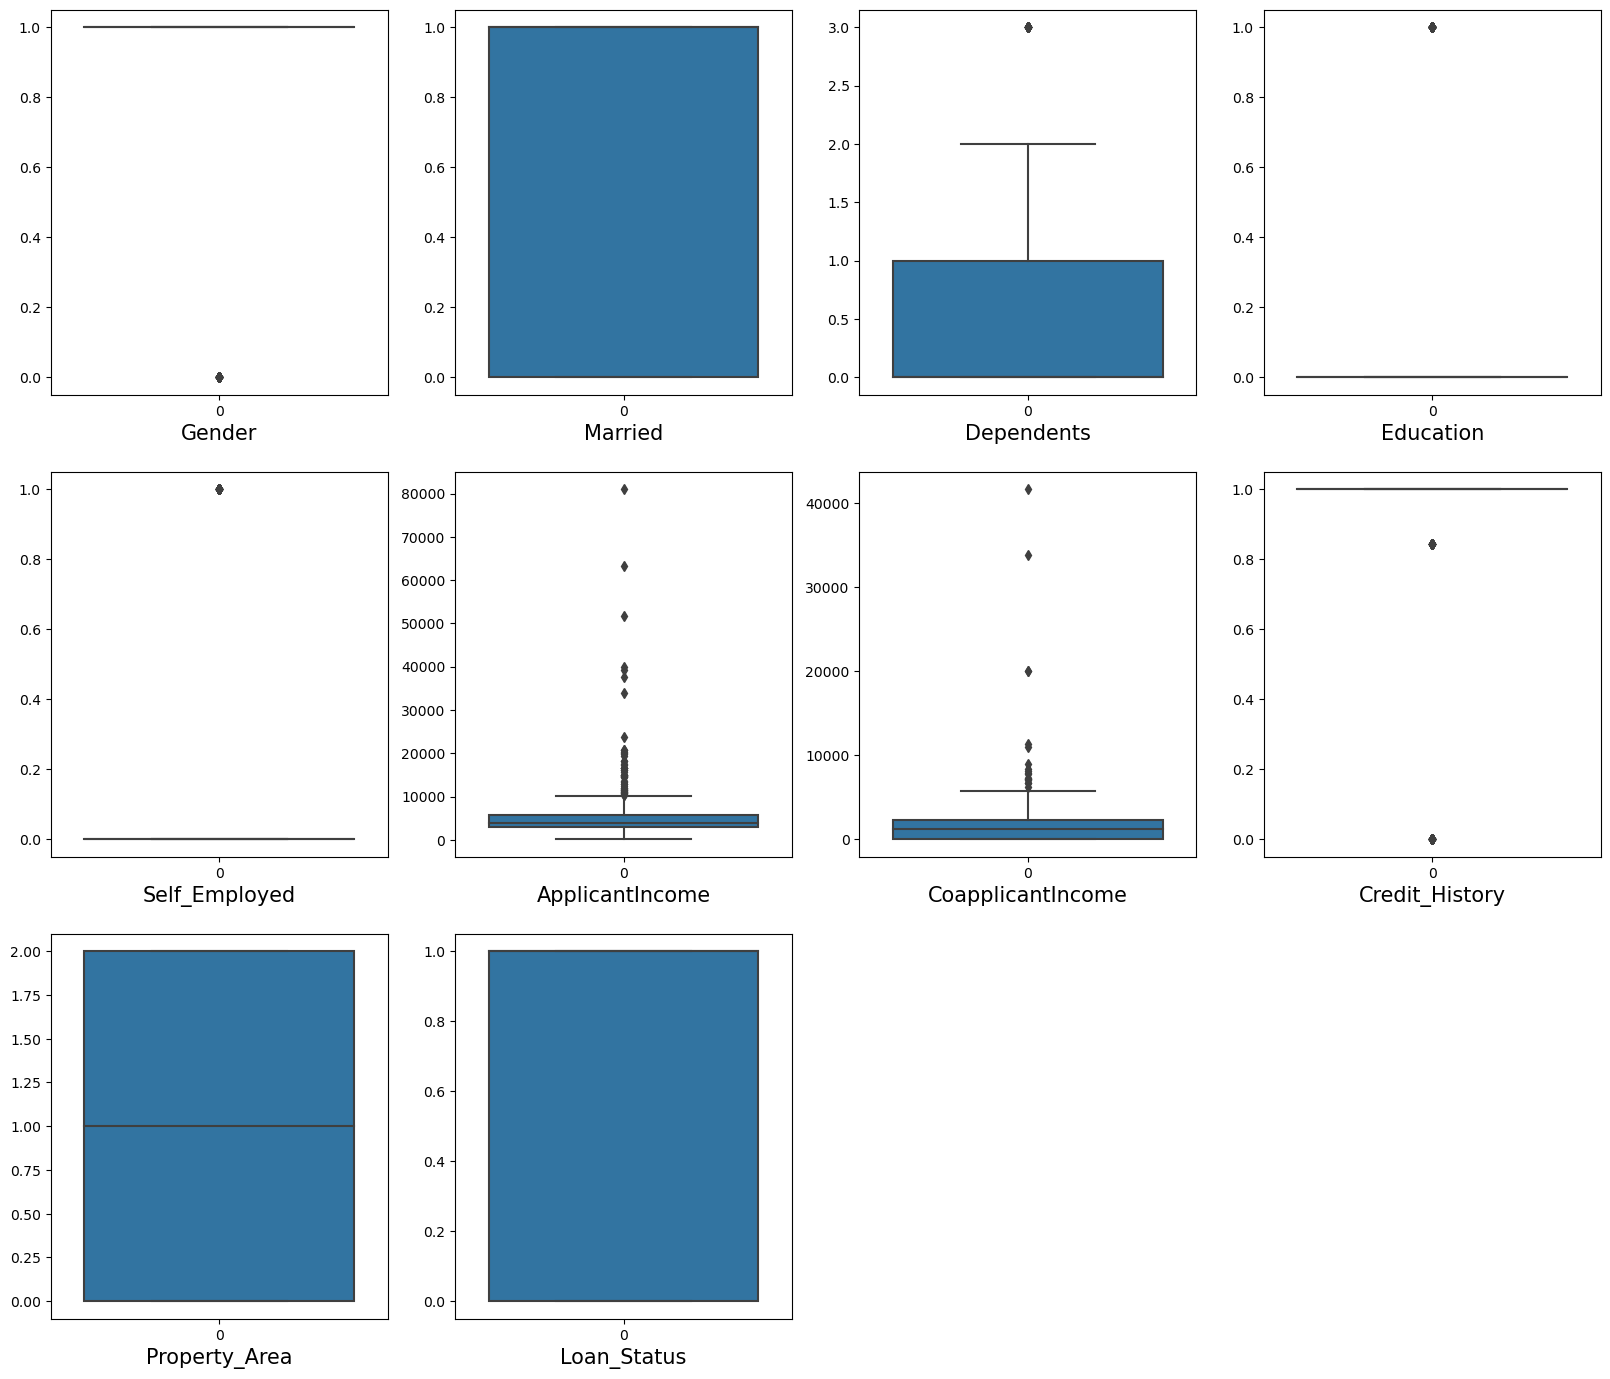

In [60]:
df_features = dt.drop('Loan_Amount_Term',axis=1)

plt.figure(figsize=(20,35))
graph = 1

for column in df_features:  
    if graph<=22:
        plt.subplot(6, 4, graph)
        ax=sns.boxplot(data= df_features [column])
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [61]:
dt.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
from scipy.stats import zscore 

z_score = zscore(dt[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
dt = dt[filtering_entry]

dt.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02,585.000000,585.000000,585.000000
mean,0.817094,0.658120,0.728205,0.222222,0.135043,4882.764103,1432.013538,4.206466e+07,0.846881,1.027350,0.699145
std,0.386920,0.474746,0.992941,0.416095,0.342062,3347.196512,1694.823223,1.247904e+07,0.344923,0.791178,0.459022
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,1.728000e+03,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2895.000000,0.000000,4.665600e+07,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.000000,1210.000000,4.665600e+07,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5726.000000,2275.000000,4.665600e+07,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20833.000000,8980.000000,4.665600e+07,1.000000,2.000000,1.000000


In [63]:
from scipy.stats import zscore 

z_score = zscore(dt[['ApplicantIncome', 'CoapplicantIncome']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
dt = dt[filtering_entry]

dt.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,551.000000,551.000000,551.000000
mean,0.816697,0.651543,0.725953,0.230490,0.123412,4381.379310,1338.921815,4.207496e+07,0.845265,1.032668,0.698730
std,0.387266,0.476915,0.994182,0.421529,0.329208,2288.183232,1464.126393,1.250022e+07,0.346287,0.790181,0.459227
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,1.728000e+03,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2874.000000,0.000000,4.665600e+07,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3716.000000,1229.000000,4.665600e+07,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5324.500000,2241.000000,4.665600e+07,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,13650.000000,5701.000000,4.665600e+07,1.000000,2.000000,1.000000


In [64]:
from scipy.stats import zscore 

z_score = zscore(dt[['ApplicantIncome']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.2).all(axis=1)
dt = dt[filtering_entry]

dt.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02,522.000000,522.000000,522.000000
mean,0.819923,0.653257,0.720307,0.243295,0.113027,4021.201149,1391.323602,4.211798e+07,0.842718,1.019157,0.701149
std,0.384620,0.476390,0.994384,0.429483,0.316929,1727.120422,1469.521946,1.244382e+07,0.348310,0.788361,0.458193
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,1.728000e+03,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2768.250000,0.000000,4.665600e+07,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3609.000000,1353.000000,4.665600e+07,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,4911.500000,2281.000000,4.665600e+07,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,9357.000000,5701.000000,4.665600e+07,1.000000,2.000000,1.000000


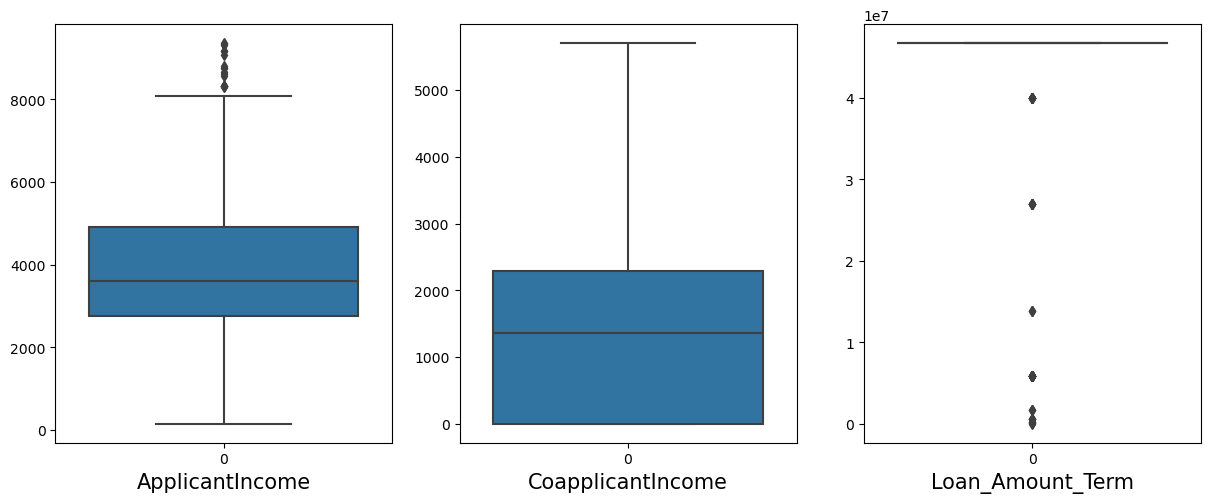

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in dt[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']]: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= dt[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [66]:
dt.shape

(522, 11)

# 

# 

## Oversampling

In [67]:
dt["Loan_Status"].unique()

array([1, 0], dtype=int64)

In [68]:
dt["Loan_Status"].value_counts()

1    366
0    156
Name: Loan_Status, dtype: int64

In [69]:
x = dt.drop(['Loan_Status'],axis=1)
y = dt['Loan_Status']

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
upsample = SMOTE()

In [72]:
x, y = upsample.fit_resample(x,y)

In [73]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 366, 0: 366})


# 

## Standardization

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

## Train-Test split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

## Importing important Metrices

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

# 

# 

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [80]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [81]:
cls_reg.coef_

array([[ 0.04893814,  0.17384606,  0.06034105, -0.01272654,  0.0936894 ,
         0.06483136,  0.2936697 ,  0.06525481,  1.99528707,  0.35371864]])

In [82]:
cls_reg.intercept_

array([-0.41105131])

### Accuracy Score of Training Data

In [83]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.7814207650273224


### Predicting Test Data

In [84]:
y_pred = cls_reg.predict(x_test)

### Accuracy Score of Testing Data

In [85]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7431693989071039


### Confusion Matrix

In [86]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[46, 41],
       [ 6, 90]], dtype=int64)

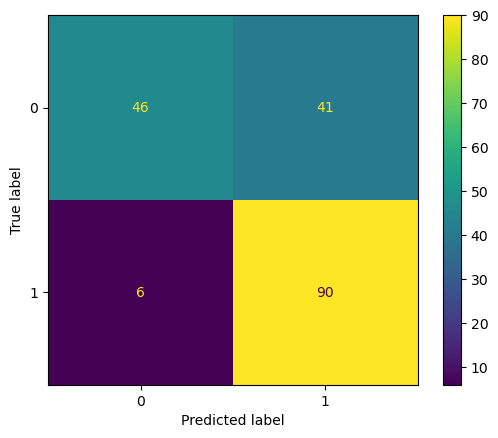

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_reg, x_test, y_test)
plt.show()

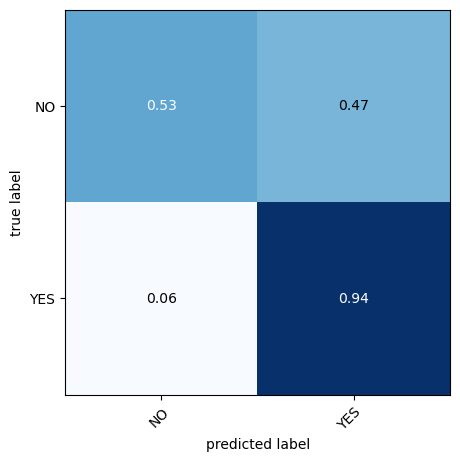

In [88]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66        87
           1       0.69      0.94      0.79        96

    accuracy                           0.74       183
   macro avg       0.79      0.73      0.73       183
weighted avg       0.78      0.74      0.73       183



### Cross-validation

In [90]:
from sklearn.model_selection import KFold, cross_val_score

In [91]:
c1=cross_val_score (cls_reg, x_train, y_train, cv=5)
c1

array([0.81818182, 0.8       , 0.74545455, 0.73636364, 0.78899083])

In [92]:
c1.mean()

0.7777981651376147

In [93]:
c2=cross_val_score (cls_reg, x_test, y_test, cv=5)
c2

array([0.7027027 , 0.81081081, 0.7027027 , 0.77777778, 0.80555556])

In [94]:
c2.mean()

0.7599099099099099

### ROC Curve

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [96]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.     0.9375 1.    ]
False Positive rate =  [0.         0.47126437 1.        ]


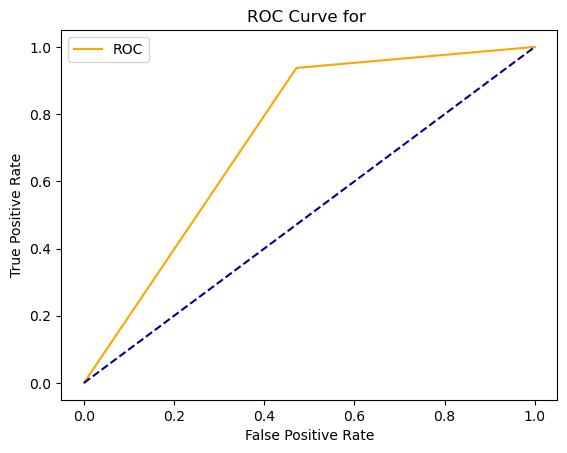

In [97]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [98]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.733117816091954

# 

# 

## Applying BaggingClassifier to DecisionTreeClassifier

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_features=None, min_samples_leaf=8, min_samples_split=2,max_depth=5))

In [101]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        min_samples_leaf=8))

### Accuracy Score of Training Data

In [102]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.8469945355191257


### Predicting Test Data

In [103]:
y_pred = bag1.predict(x_test)

### Accuracy Score of Testing Data

In [104]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8032786885245902


### Confusion Matrix

In [105]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[54, 33],
       [ 3, 93]], dtype=int64)

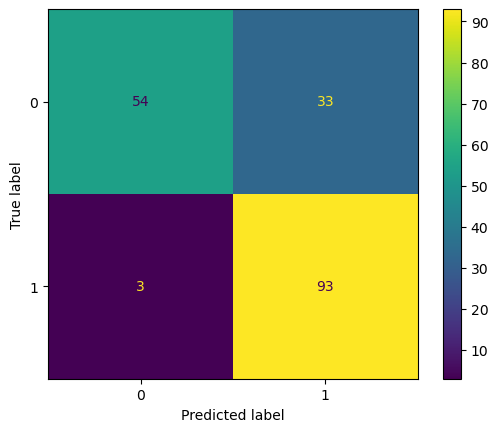

In [106]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bag1, x_test, y_test)
plt.show()

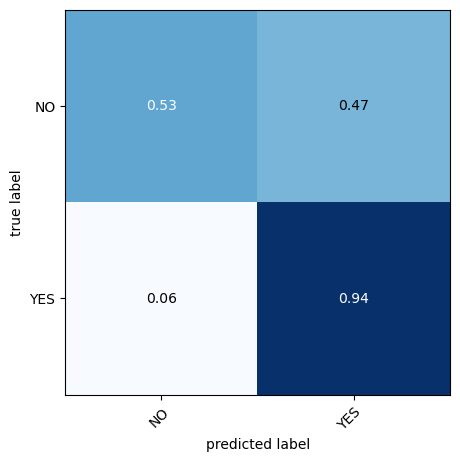

In [107]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75        87
           1       0.74      0.97      0.84        96

    accuracy                           0.80       183
   macro avg       0.84      0.79      0.79       183
weighted avg       0.84      0.80      0.80       183



### Cross-validation

In [109]:
from sklearn.model_selection import KFold, cross_val_score

In [110]:
c7=cross_val_score (bag1, x_train, y_train, cv=5)
c7

array([0.79090909, 0.80909091, 0.77272727, 0.76363636, 0.79816514])

In [111]:
c7.mean()

0.786905754795663

In [112]:
c8=cross_val_score (bag1, x_test, y_test, cv=5)
c8

array([0.59459459, 0.75675676, 0.75675676, 0.77777778, 0.86111111])

In [113]:
c8.mean()

0.7493993993993994

### ROC Curve

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [115]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.      0.96875 1.     ]
False Positive rate =  [0.         0.37931034 1.        ]


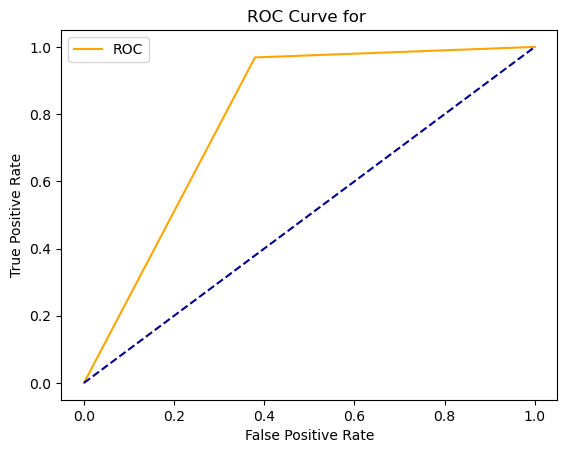

In [116]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [117]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.794719827586207

# 

# 

## Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 50}

In [120]:
cls_rf = RandomForestClassifier(n_estimators=250,criterion='gini',max_features=None,min_samples_split=6,max_depth=20)

In [121]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=6,
                       n_estimators=250)

### Accuracy Score of Training Data

In [122]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.9635701275045537


### Predicting Test Data

In [123]:
y_pred = cls_rf.predict(x_test)

### Accuracy Score of Testing Data

In [124]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7923497267759563


### Confusion Matrix

In [125]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[67, 20],
       [18, 78]], dtype=int64)

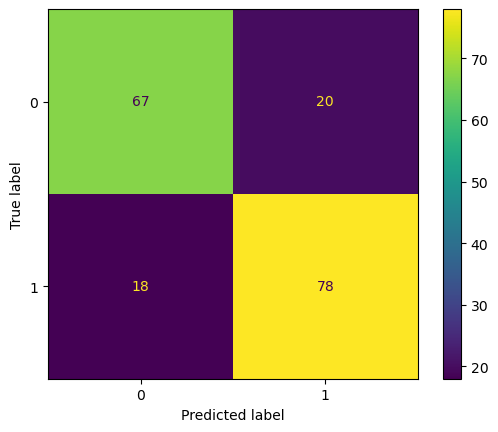

In [126]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_rf, x_test, y_test)
plt.show()

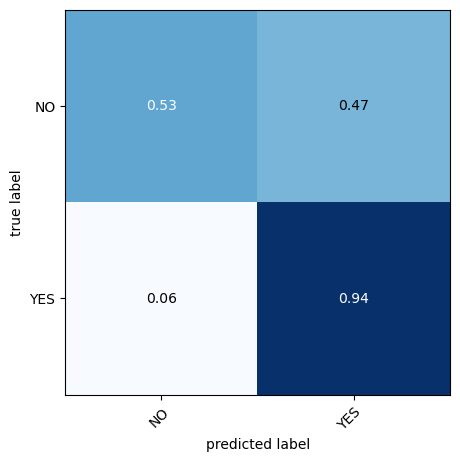

In [127]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        87
           1       0.80      0.81      0.80        96

    accuracy                           0.79       183
   macro avg       0.79      0.79      0.79       183
weighted avg       0.79      0.79      0.79       183



### Cross-validation

In [129]:
from sklearn.model_selection import KFold, cross_val_score

In [130]:
c9=cross_val_score (cls_rf, x_train, y_train, cv=5)
c9

array([0.79090909, 0.82727273, 0.8       , 0.77272727, 0.80733945])

In [131]:
c9.mean()

0.799649708090075

In [132]:
c10=cross_val_score (cls_rf, x_test, y_test, cv=5)
c10

array([0.59459459, 0.78378378, 0.78378378, 0.75      , 0.83333333])

In [133]:
c10.mean()

0.7490990990990991

### ROC Curve

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [135]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.     0.8125 1.    ]
False Positive rate =  [0.         0.22988506 1.        ]


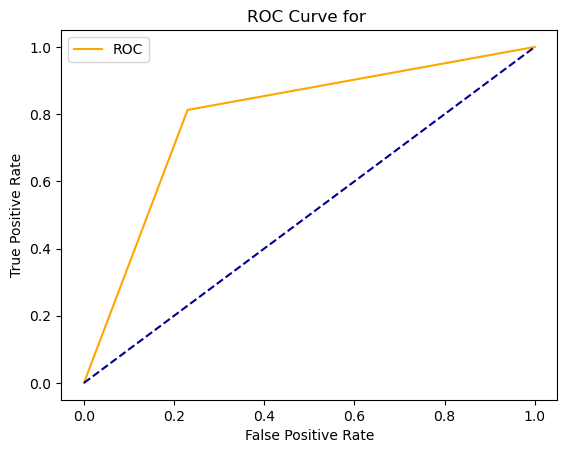

In [136]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [137]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7913074712643678

# 

# 

## Applying BaggingClassifier to RandomForestClassifier

In [138]:
from sklearn.ensemble import BaggingClassifier

In [139]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=250,criterion='gini',max_features=None,min_samples_split=6,max_depth=20))

In [140]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                        max_features=None,
                                                        min_samples_split=6,
                                                        n_estimators=250))

### Accuracy Score of Training Data

In [141]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.9143897996357013


### Predicting Test Data

In [142]:
y_pred = bag2.predict(x_test)

### Accuracy Score of Testing Data

In [143]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7595628415300546


### Confusion Matrix

In [144]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[59, 28],
       [16, 80]], dtype=int64)

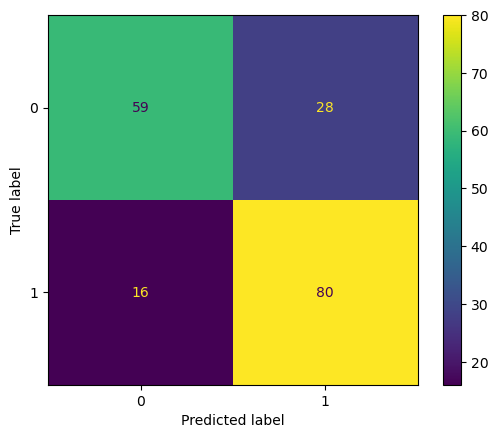

In [145]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bag2, x_test, y_test)
plt.show()

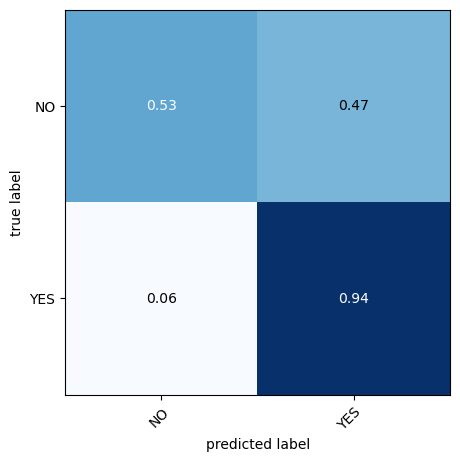

In [146]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        87
           1       0.74      0.83      0.78        96

    accuracy                           0.76       183
   macro avg       0.76      0.76      0.76       183
weighted avg       0.76      0.76      0.76       183



### Cross-validation

In [148]:
from sklearn.model_selection import KFold, cross_val_score

In [149]:
c11=cross_val_score (bag2, x_train, y_train, cv=5)
c1

array([0.81818182, 0.8       , 0.74545455, 0.73636364, 0.78899083])

In [150]:
c11.mean()

0.7996330275229357

In [151]:
c12=cross_val_score (bag2, x_test, y_test, cv=5)
c12

array([0.64864865, 0.78378378, 0.75675676, 0.75      , 0.80555556])

In [152]:
c12.mean()

0.7489489489489489

### ROC Curve

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [154]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.83333333 1.        ]
False Positive rate =  [0.         0.32183908 1.        ]


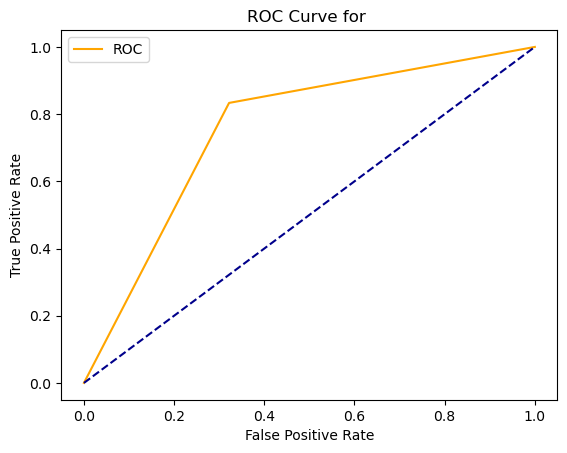

In [155]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [156]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7557471264367817

# 

# 

## KNeighbors Classifier

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [159]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

### Accuracy Score of Training Data

In [160]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 1.0


### Predicting Test Data

In [161]:
y_pred = cls_KN.predict(x_test)

### Accuracy Score of Testing Data

In [162]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8142076502732241


### Confusion Matrix

In [163]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[66, 21],
       [13, 83]], dtype=int64)

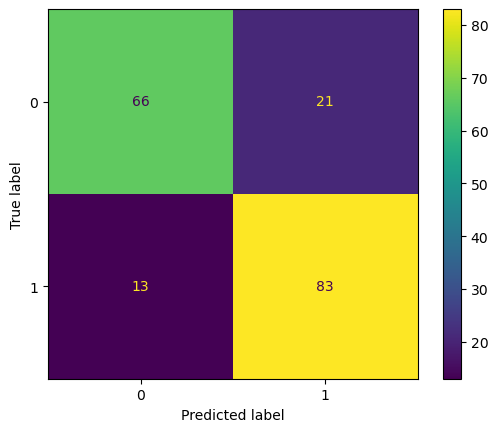

In [164]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls_KN, x_test, y_test)
plt.show()

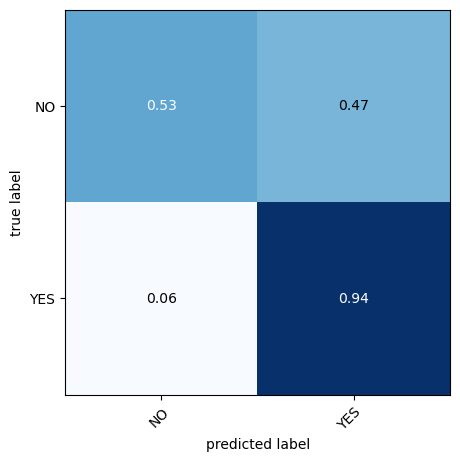

In [165]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        87
           1       0.80      0.86      0.83        96

    accuracy                           0.81       183
   macro avg       0.82      0.81      0.81       183
weighted avg       0.82      0.81      0.81       183



### Cross-validation

In [167]:
from sklearn.model_selection import KFold, cross_val_score

In [168]:
c13=cross_val_score (cls_KN, x_train, y_train, cv=5)
c13

array([0.79090909, 0.77272727, 0.73636364, 0.70909091, 0.7706422 ])

In [169]:
c13.mean()

0.7559466221851542

In [170]:
c14=cross_val_score (cls_KN, x_test, y_test, cv=5)
c14

array([0.75675676, 0.72972973, 0.83783784, 0.69444444, 0.83333333])

In [171]:
c14.mean()

0.7704204204204204

### ROC Curve

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [173]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.86458333 1.        ]
False Positive rate =  [0.         0.24137931 1.        ]


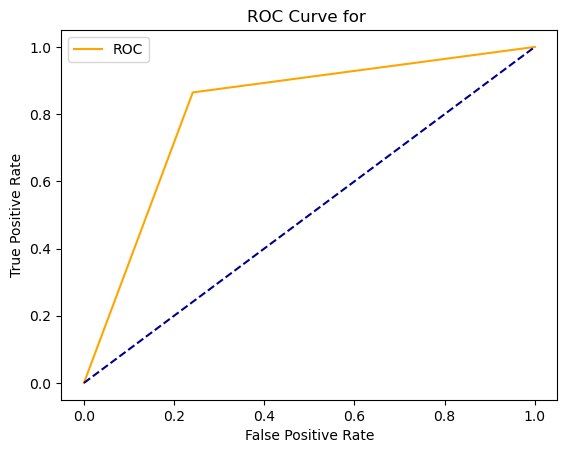

In [174]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [175]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.8116020114942529

# 

# 

## GaussianNB

In [176]:
from sklearn.naive_bayes import GaussianNB

In [177]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [178]:
gnb = GaussianNB(var_smoothing=1e-09)

In [179]:
gnb.fit(x_train, y_train)

GaussianNB()

### Accuracy Score of Training Data

In [180]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.7777777777777778


### Predicting Test Data

In [181]:
y_pred = gnb.predict(x_test)

### Accuracy Score of Testing Data

In [182]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7595628415300546


### Confusion Matrix

In [183]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[45, 42],
       [ 2, 94]], dtype=int64)

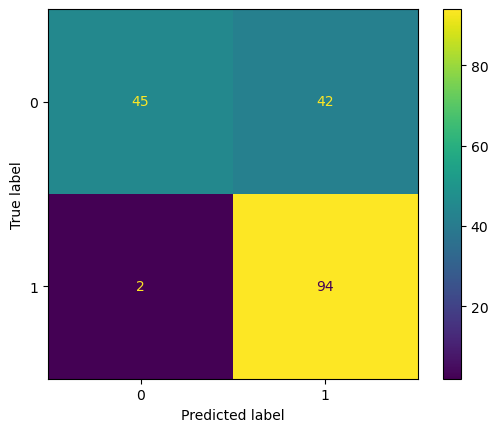

In [184]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_test, y_test)
plt.show()

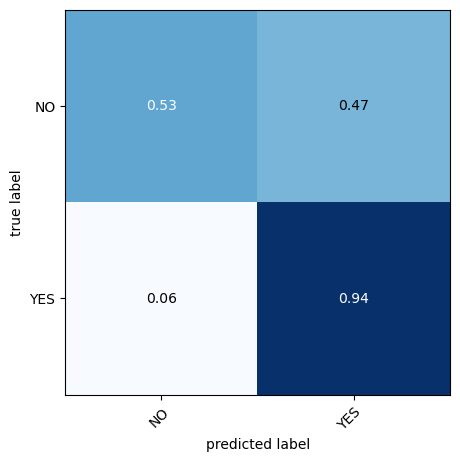

In [185]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.52      0.67        87
           1       0.69      0.98      0.81        96

    accuracy                           0.76       183
   macro avg       0.82      0.75      0.74       183
weighted avg       0.82      0.76      0.74       183



### Cross-validation

In [187]:
from sklearn.model_selection import KFold, cross_val_score

In [188]:
c19=cross_val_score (gnb, x_train, y_train, cv=5)
c19

array([0.79090909, 0.80909091, 0.73636364, 0.7       , 0.79816514])

In [189]:
c19.mean()

0.766905754795663

In [190]:
c20=cross_val_score (gnb, x_test, y_test, cv=5)
c20

array([0.7027027 , 0.81081081, 0.7027027 , 0.77777778, 0.80555556])

In [191]:
c20.mean()

0.7599099099099099

### ROC Curve

In [192]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [193]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.97916667 1.        ]
False Positive rate =  [0.         0.48275862 1.        ]


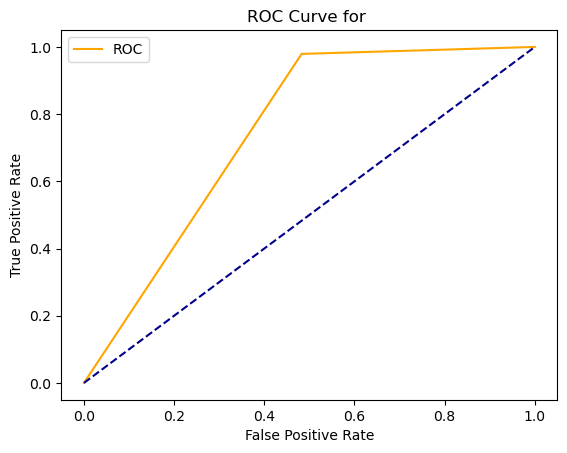

In [194]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [195]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7482040229885056

# 

# 

## Applying BaggingClassifier to GaussianNB

In [196]:
from sklearn.ensemble import BaggingClassifier

In [197]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [198]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

### Accuracy Score of Training Data

In [199]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.7777777777777778


### Predicting Test Data

In [200]:
y_pred = bag6.predict(x_test)

### Accuracy Score of Testing Data

In [201]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7486338797814208


### Confusion Matrix

In [202]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[45, 42],
       [ 4, 92]], dtype=int64)

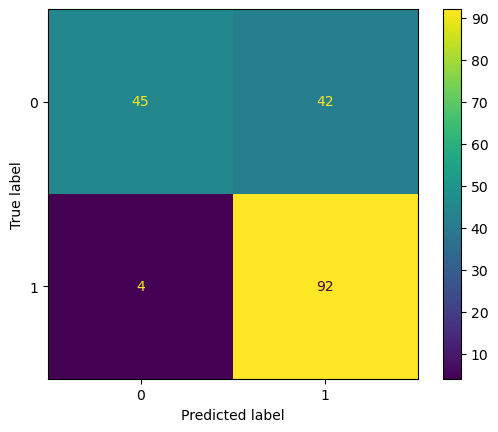

In [203]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bag6, x_test, y_test)
plt.show()

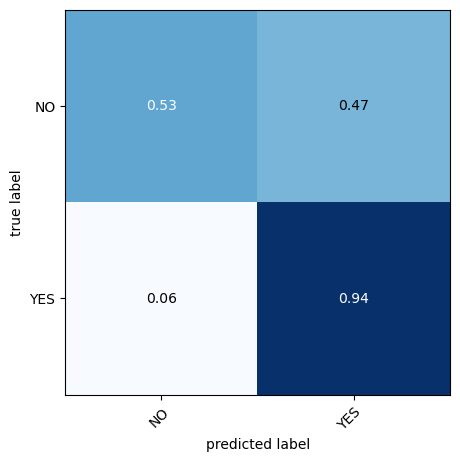

In [204]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,
                                class_names=['NO', 'YES'],
                                figsize=(5,5))
fig.show()

### Classification Report

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.52      0.66        87
           1       0.69      0.96      0.80        96

    accuracy                           0.75       183
   macro avg       0.80      0.74      0.73       183
weighted avg       0.80      0.75      0.73       183



### Cross-validation

In [206]:
from sklearn.model_selection import KFold, cross_val_score

In [207]:
c19=cross_val_score (bag6, x_train, y_train, cv=5)
c19

array([0.76363636, 0.78181818, 0.72727273, 0.70909091, 0.79816514])

In [208]:
c19.mean()

0.755996663886572

In [209]:
c20=cross_val_score (bag6, x_test, y_test, cv=5)
c20

array([0.67567568, 0.81081081, 0.67567568, 0.77777778, 0.80555556])

In [210]:
c20.mean()

0.7490990990990991

### ROC Curve

In [211]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [212]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95833333 1.        ]
False Positive rate =  [0.         0.48275862 1.        ]


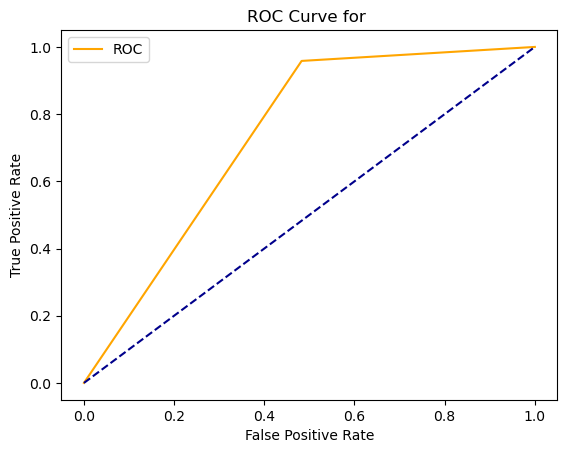

In [213]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

### roc_auc_score

In [214]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.737787356321839

# 

# 

## Plotting ROC Curve for all models

In [215]:
from sklearn.metrics import plot_roc_curve

**On Training Data**

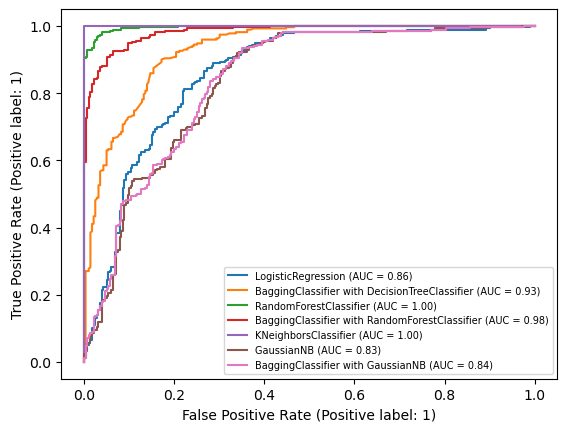

In [216]:
disp = plot_roc_curve (cls_reg, x_train, y_train)

plot_roc_curve (bag1, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with DecisionTreeClassifier')
plot_roc_curve (cls_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag2, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with RandomForestClassifier')
plot_roc_curve (cls_KN, x_train, y_train, ax=disp.ax_)
plot_roc_curve (gnb, x_train, y_train, ax=disp.ax_)
plot_roc_curve (bag6, x_train, y_train, ax=disp.ax_, name='BaggingClassifier with GaussianNB')

plt.legend (prop={'size' :7}, loc= 'lower right')
                  
plt.show()

**On Testing Data**

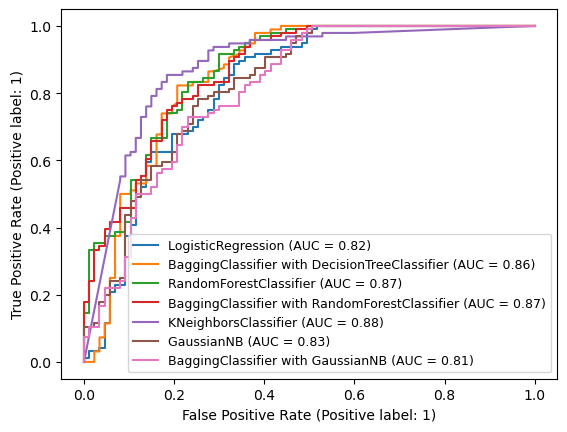

In [217]:
disp = plot_roc_curve (cls_reg, x_test, y_test)

plot_roc_curve (bag1, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with DecisionTreeClassifier')
plot_roc_curve (cls_rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag2, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with RandomForestClassifier')
plot_roc_curve (cls_KN, x_test, y_test, ax=disp.ax_)
plot_roc_curve (gnb, x_test, y_test, ax=disp.ax_)
plot_roc_curve (bag6, x_test, y_test, ax=disp.ax_, name='BaggingClassifier with GaussianNB')

plt.legend (prop={'size' :9}, loc= 'lower right')
                  
plt.show()

# 

# 

## Saving the Top 3 Best Models

In [218]:
import pickle 

In [219]:
with open('bag_rf', 'wb') as f: 
    pickle.dump(bag2, f)

In [220]:
with open('cls_rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

In [221]:
with open('bag_dt', 'wb') as f: 
    pickle.dump(bag1, f)

# 

## Opening the Saved Models

In [222]:
with open('bag_rf', 'rb') as f:
    l1 = pickle.load(f)

In [223]:
with open('cls_rf', 'rb') as f:
    l2 = pickle.load(f)

In [224]:
with open('bag_dt', 'rb') as f:
    l3 = pickle.load(f)

# 

## Predicting using Saved models

In [225]:
l1.predict(scaler.transform([[1, 1, 1, 0, 0, 4583, 1508.0, 46656000.0, 1.0, 0]]))

array([0], dtype=int64)

In [226]:
l2.predict(scaler.transform([[1, 1, 1, 0, 0, 4583, 1508.0, 46656000.0, 1.0, 0]]))

array([0], dtype=int64)

In [227]:
l3.predict(scaler.transform([[1, 1, 1, 0, 0, 4583, 1508.0, 46656000.0, 1.0, 0]]))

array([0], dtype=int64)

# 

# 